## WILDFIRE STUDY IN NORTHERN CALIFORNIA USING REMOTE SENSING

California is the most populous and the third largest state in USA. Due to it being a part of the 'ring of fire', it is subject to many natural disasters. One such disaster is wildfire. A wildfire is an uncontrolled fire in an area which has vegetation.   
The study area is northern California with the counties of Del Norte, Siskiyou, Modoc, Humboldt, Trinity, Shasta, Lassen and Tehama. These counties of Northern California controls a large number of National Parks and protected areas. Thus, it is a valid study area for wildfires.  
We use Remote sensing data for our study. LANDSAT imagery data is used which is obtained from [Earth Explorer](https://earthexplorer.usgs.gov/). LANDSAT is multispectral, which means it is multiband data and collected using a platform mounted on a satellite in space that orbits the earth. The study time period was the May 2021 to May 2022.  

### Installing Dependencies

In [1]:
!pip install earthpy --quiet
!pip install rioxarray --quiet
!pip install earthpy --quiet
!pip install xarray --quiet
!pip install geopandas --quiet
!pip install rasterio --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 61.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 45.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 29.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 1.9 MB/s eta 0:00:00


### Importing Libraries

In [2]:
import geopandas as gpd
import rioxarray as rxr
import earthpy.plot as ep

### Loading data
As the notebook was run on Google colab, the data was stored and loaded from drive

In [3]:
import os
os.listdir('/content/drive/MyDrive/NBR')

['LC08_L2SP_045031_20210531_20210608_02_T1_SR_B7.TIF',
 'LC09_L2SP_045031_20220627_20230409_02_T1_SR_B7.TIF',
 'LC09_L2SP_045031_20220627_20230409_02_T1_SR_B5.TIF',
 'LC08_L2SP_045031_20210531_20210608_02_T1_SR_B5.TIF',
 'LC08_L2SP_045031_20211107_20211117_02_T1_SR_B5.TIF',
 'LC08_L2SP_045031_20211107_20211117_02_T1_SR_B7.TIF',
 'California_Fire_Perimeters_(all).zip']

We use Difference NBR index for our wildfire analysis. NBR stands for Normalized Burn Ratio. Difference NBR is the difference of Postfire and Prefire values. It is used to find burned areas and can also find severity of burned forest. It uses 2 main bands from LANDSAT named Near Infrared (NIR) and Short Wave Infrared (SWIR). NBR is calculated by the following formula:  
NBR = (SWIR - NIR)/(SWIR + NIR)  
Difference NBR or dNBR is calculated as follows:  
dNBR = Postfire NBR - Prefire NBR  

In [4]:
#Loading the downloaded tif files from Earth Explorer

swir_may_2021 = rxr.open_rasterio('/content/drive/MyDrive/NBR/LC08_L2SP_045031_20210531_20210608_02_T1_SR_B7.TIF',masked=True)
swir_2022 = rxr.open_rasterio('/content/drive/MyDrive/NBR/LC09_L2SP_045031_20220627_20230409_02_T1_SR_B7.TIF',masked=True)
nir_may_2021 = rxr.open_rasterio('/content/drive/MyDrive/NBR/LC08_L2SP_045031_20210531_20210608_02_T1_SR_B5.TIF',masked=True)
nir_2022 = rxr.open_rasterio('/content/drive/MyDrive/NBR/LC09_L2SP_045031_20220627_20230409_02_T1_SR_B5.TIF',masked=True)

In [5]:
#Calculating difference NBR
nbr = ((swir_2022 - nir_2022)/(swir_2022 + nir_2022)) - ((swir_may_2021 - nir_may_2021)/(swir_may_2021 + nir_may_2021))

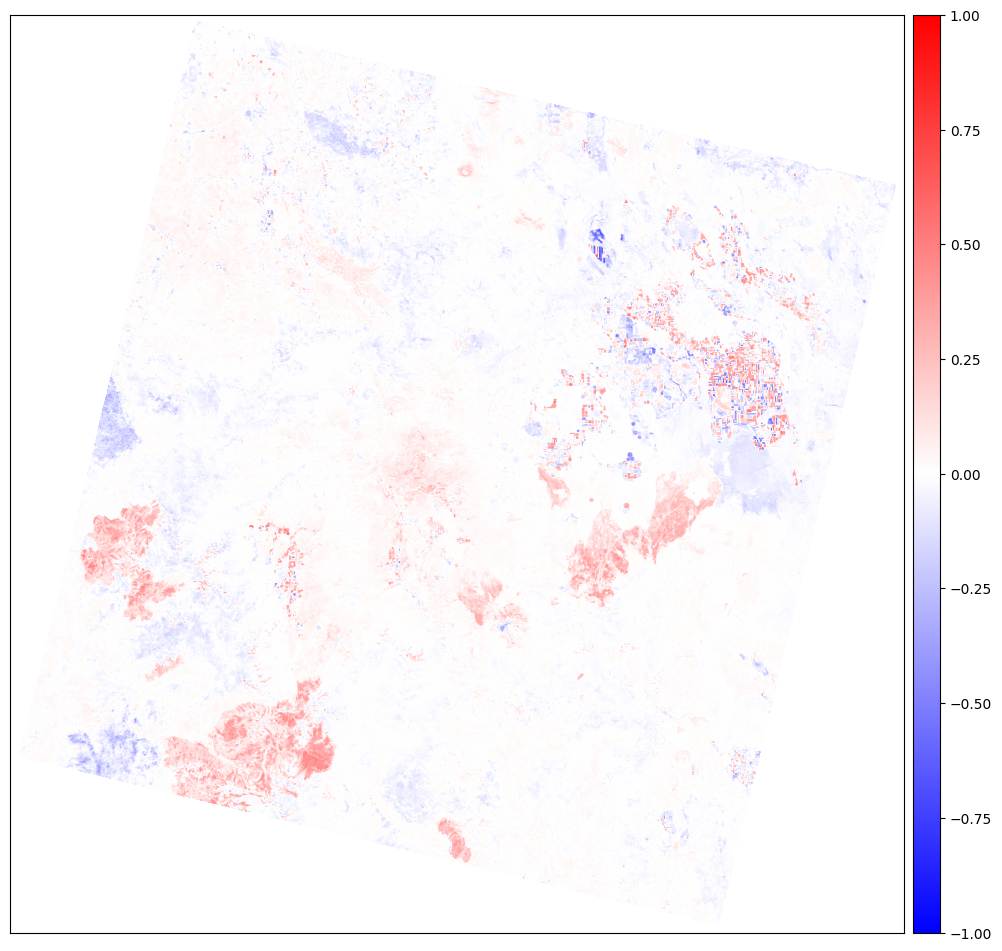

<Axes: >

In [6]:
ep.plot_bands(nbr,cmap='bwr',vmin=-1,vmax=1)

Higher the value, more affected a place is from wildfire. As it is visible from the plot, 2 major wildfires had taken place in the time period in the bottom left or the south west side of the study region which are seen in red. There is also some wildfires in the central region and eastern part of the study area.

### Overlaying the wildfire data

Here we load a dataframe with details of all wildfires in the state of California. This dataframe contains details about the fire name, year it happened, how many acres is affected and from when to when was it active along with some other data. We filter out data to time period between May 2021 and May 2022 and to the counties mentioned above.  


In [7]:
!unzip '/content/drive/MyDrive/NBR/California_Fire_Perimeters_(all).zip'

Archive:  /content/drive/MyDrive/NBR/California_Fire_Perimeters_(all).zip
  inflating: California_Fire_Perimeters__all_.shp  
  inflating: California_Fire_Perimeters__all_.shx  
  inflating: California_Fire_Perimeters__all_.dbf  
 extracting: California_Fire_Perimeters__all_.cpg  
  inflating: California_Fire_Perimeters__all_.prj  
  inflating: California_Fire_Perimeters_(all).xml  


In [50]:
import geopandas as gpd
df = gpd.read_file('/content/California_Fire_Perimeters__all_.shp')

In [51]:
# filtering dataframe to wildfires taking place only in the year 2021 and which affected an area of more than 150 acres
print(df.shape)
df = df[(df['YEAR_']=='2021') & (df['GIS_ACRES'] > 150)]
print(df.shape)

(21688, 21)
(86, 21)


After some research done on the wildfires which happened in Northern California, we find the 4 major wildfires that took place in the region around May 2022 were named **RIVER COMPLEX**,**MCCASH**,**TENNANT**,**ANTELOPE**. We plot the wildfire shapefiles with respect to these 4 wildfires over our NBR plot

In [52]:
wildfire_2021 = df[df['FIRE_NAME'].isin(['RIVER COMPLEX', 'LAVA', 'MCCASH', 'ANTELOPE','TENNANT'])]

In [53]:
wildfire_2021

,OBJECTID,YEAR_,STATE,AGENCY,UNIT_ID,FIRE_NAME,INC_NUM,ALARM_DATE,CONT_DATE,CAUSE,...,REPORT_AC,GIS_ACRES,C_METHOD,OBJECTIVE,FIRE_NUM,COMPLEX_NA,COMPLEX_IN,SHAPE_Leng,SHAPE_Area,geometry
21568,43072,2021,CA,USF,SHF,LAVA,00000949,2021-06-25,2021-10-26,1.0,...,26329.0,26328.900391,7.0,1.0,NaN,NaN,NaN,1.593800e+05,1.899917e+08,"MULTIPOLYGON (((-13616395.174 5095464.037, -13..."
21571,43075,2021,CA,USF,KNF,TENNANT,00005169,2021-06-28,2022-01-03,14.0,...,10580.0,10591.031250,3.0,1.0,NaN,NaN,NaN,9.593275e+04,7.698567e+07,"POLYGON ((-13587175.808 5125828.574, -13587155..."
21588,43096,2021,CA,USF,KNF,ANTELOPE,00006454,2021-08-01,2022-01-03,1.0,...,145632.0,145631.750000,7.0,1.0,NaN,NaN,NaN,5.097316e+05,1.055549e+09,"MULTIPOLYGON (((-13569131.488 5075846.233, -13..."
21606,43114,2021,CA,USF,SRF,MCCASH,00000651,2021-08-01,2021-10-27,1.0,...,94962.0,94970.468750,7.0,1.0,NaN,NaN,NaN,4.183286e+05,6.870514e+08,"MULTIPOLYGON (((-13723265.951 5115152.550, -13..."
21675,43183,2021,CA,USF,KNF,RIVER COMPLEX,00006385,2021-07-31,2021-10-25,1.0,...,155752.0,199354.093750,7.0,1.0,NaN,RIVER COMPLEX,00006385,1.615528e+06,1.422803e+09,"MULTIPOLYGON (((-13701441.081 5005786.910, -13..."


Before overlaying the wildfire shapefiles over the nbr plot, we first need to make their CRS same. This is done to ensure both, the satellite imaging data and wildfire shapefiles are in the same coordinate reference system

In [54]:
wildfire_2021_transformed = wildfire_2021.to_crs(nbr.rio.crs)
wildfire_2021_transformed.crs == nbr.rio.crs

True

<Axes: title={'center': 'band = 1, spatial_ref = 0'}, xlabel='x', ylabel='y'>

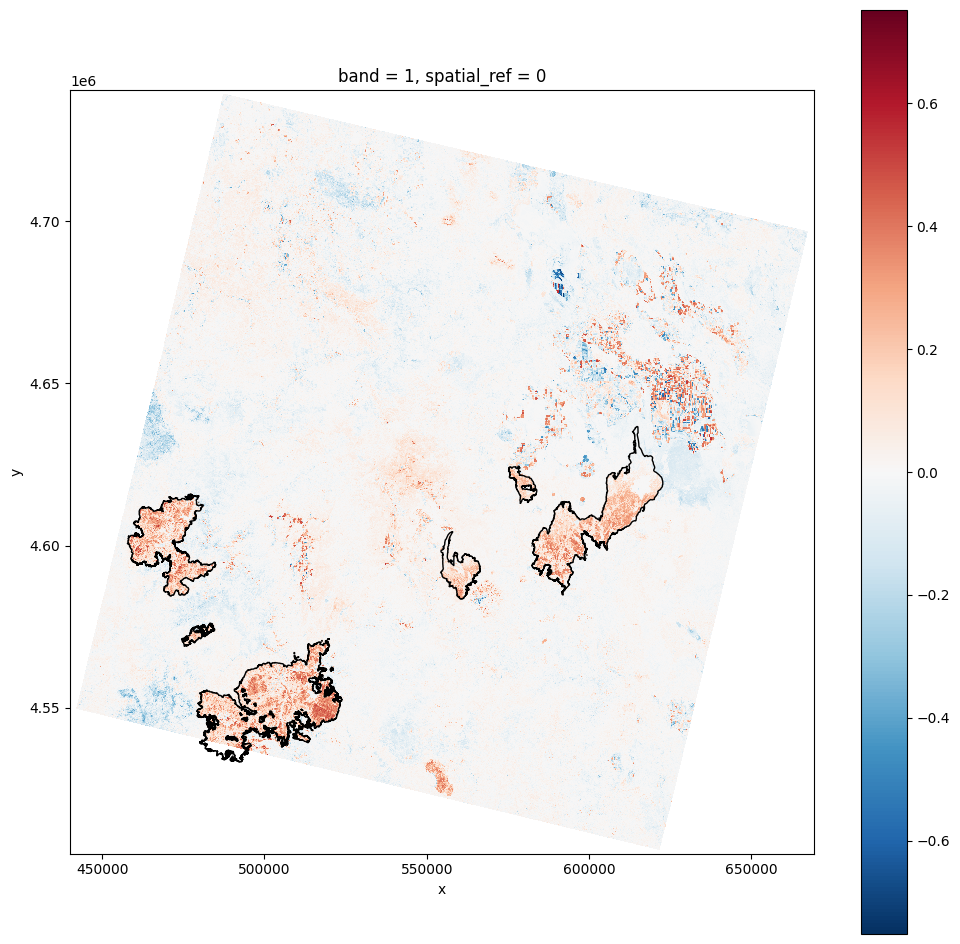

In [55]:
from rasterio.plot import plotting_extent
import earthpy.plot as ep
from shapely.geometry import mapping
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 12))
extent = plotting_extent(nbr,nbr.rio.transform())
extent = wildfire_2021_transformed.geometry.total_bounds
nbr[0].plot.imshow(ax=ax)
wildfire_2021_transformed.plot(color='None',edgecolor='black',ax=ax)

We can see that the wildfire shapefiles align pretty well with the highly affected zones found in the NBR plot in red. A small disadvantage of NBR is that it doesn't work well for water bodies. This is visible in the north east part of the plot where there are Lake Tula national wildlife refuge and Lower Klamath national wildlife refuge.